# Web scraping: Creación de un Dataset de películas de Disney
Lista de peliculas de Disney en Wikipedia: https://en.wikipedia.org/wiki/List_of_Walt_Disney_Pictures_films

Menciones: https://www.youtube.com/watch?v=Ewgy-G9cmbg&t=8783s

In [1]:
from bs4 import BeautifulSoup as bs #para hacer scrapping
import requests #para realizar peticiones al sitio web y obtener la informacion

## 1. Cargar sitio web y plantear la lógica del scraping

In [ ]:
#Ejemplo particular
r = requests.get("https://en.wikipedia.org/wiki/Toy_Story_3")

#Convertimos lo que recibe el get en un objeto soup
soup= bs(r.content)

#Mostramos
contents= soup.prettify()
print(contents)

 


---






## **Queremos obtener los datos que contiene la caja de información sobre la película**




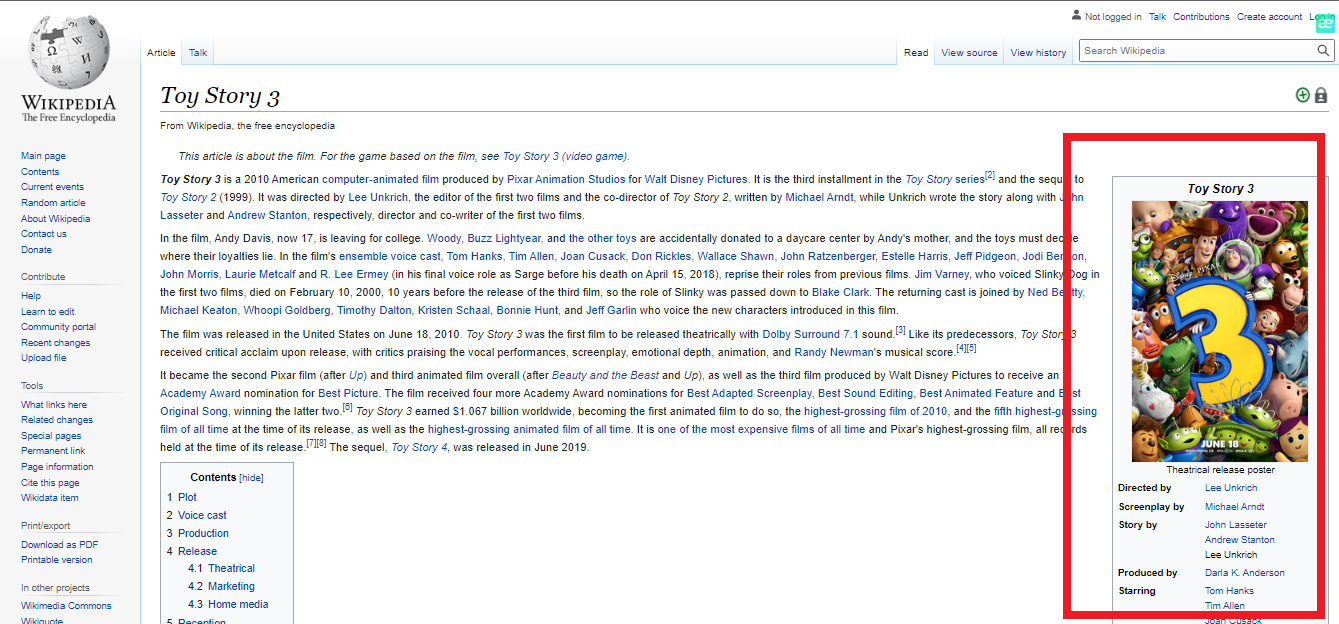



## **Para ello inspeccionamos el elemento y vemos que se trata de una tabla con la clase "infobox vevent. Podremos usar eso para localizarla en el objeto soup.**

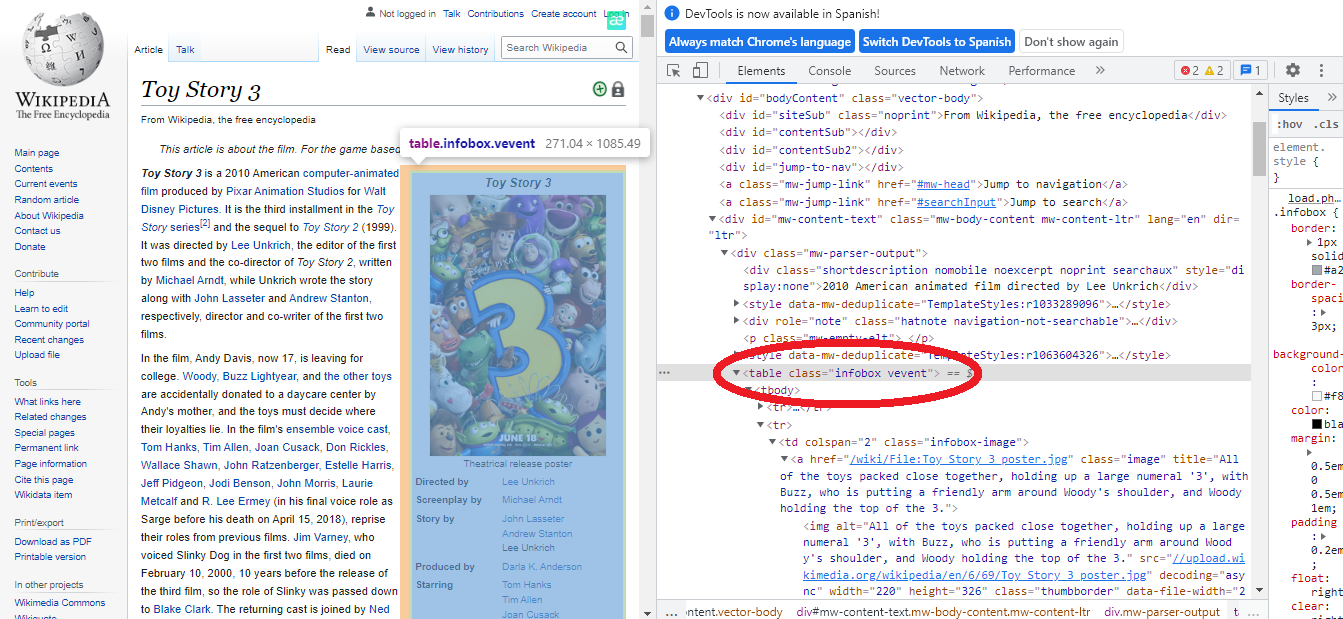

In [3]:
#Encontrando la caja de informacion
info_box= soup.find(class_="infobox vevent")
print(info_box.prettify())

<table class="infobox vevent">
 <tbody>
  <tr>
   <th class="infobox-above summary" colspan="2" style="font-size: 125%; font-style: italic;">
    Toy Story 3
   </th>
  </tr>
  <tr>
   <td class="infobox-image" colspan="2">
    <a class="image" href="/wiki/File:Toy_Story_3_poster.jpg" title="All of the toys packed close together, holding up a large numeral '3', with Buzz, who is putting a friendly arm around Woody's shoulder, and Woody holding the top of the 3.">
     <img alt="All of the toys packed close together, holding up a large numeral '3', with Buzz, who is putting a friendly arm around Woody's shoulder, and Woody holding the top of the 3." class="thumbborder" data-file-height="326" data-file-width="220" decoding="async" height="326" src="//upload.wikimedia.org/wikipedia/en/6/69/Toy_Story_3_poster.jpg" width="220"/>
    </a>
    <div class="infobox-caption">
     Theatrical release poster
    </div>
   </td>
  </tr>
  <tr>
   <th class="infobox-label" scope="row" style="white-s

In [4]:
#Localizamos cada fila de la tabla
inforows= info_box.find_all("tr")
for row in inforows:
  print(row.prettify())

<tr>
 <th class="infobox-above summary" colspan="2" style="font-size: 125%; font-style: italic;">
  Toy Story 3
 </th>
</tr>

<tr>
 <td class="infobox-image" colspan="2">
  <a class="image" href="/wiki/File:Toy_Story_3_poster.jpg" title="All of the toys packed close together, holding up a large numeral '3', with Buzz, who is putting a friendly arm around Woody's shoulder, and Woody holding the top of the 3.">
   <img alt="All of the toys packed close together, holding up a large numeral '3', with Buzz, who is putting a friendly arm around Woody's shoulder, and Woody holding the top of the 3." class="thumbborder" data-file-height="326" data-file-width="220" decoding="async" height="326" src="//upload.wikimedia.org/wikipedia/en/6/69/Toy_Story_3_poster.jpg" width="220"/>
  </a>
  <div class="infobox-caption">
   Theatrical release poster
  </div>
 </td>
</tr>

<tr>
 <th class="infobox-label" scope="row" style="white-space: nowrap; padding-right: 0.65em;">
  Directed by
 </th>
 <td class="



---






**Ahora que sabemos de donde extraer los datos, vamos a programar la lógica para obtenerlos. Recorreremos cada fila de la tabla y completaremos un diccionario con los datos conseguidos.
La función get_content_value nos ayudará a obtener el texto de cada fila y limpiarlo un poco. Como se ve debajo en dicho método, es necesario reemplazar y acomodar ciertos valores que vienen en diferentes formatos.**

In [5]:
def get_content_value(rowdata):
  #los datos en la tabla pueden venir como string (por ejemplo, titulo de la pelicula) o como lista (por ejemplo, productores de la pelicula)
  if rowdata.find("li"):
    return [li.get_text(" ",strip=True).replace("\xa0", "") for li in rowdata.find_all("li")]
  else:
    return rowdata.get_text(" ",strip=True).replace("\xa0", "")

#.replace("\xa0", "") para limpiar las fechas




#logica para obtener los datos
movie_info = {}

for index,row in enumerate(inforows):
  if index ==0:
    movie_info["Title"]= row.find("th").get_text(" ", strip=True)
  elif index==1: #Es la imagen, no nos importa.
    continue 
  else:
    content_key= row.find("th").get_text(" ", strip=True)
    content_value = get_content_value(row.find("td"))
    movie_info[content_key] = content_value


print(movie_info)

{'Title': 'Toy Story 3', 'Directed by': 'Lee Unkrich', 'Screenplay by': 'Michael Arndt', 'Story by': ['John Lasseter', 'Andrew Stanton', 'Lee Unkrich'], 'Produced by': 'Darla K. Anderson', 'Starring': ['Tom Hanks', 'Tim Allen', 'Joan Cusack', 'Don Rickles', 'Wallace Shawn', 'John Ratzenberger', 'Estelle Harris', 'Ned Beatty', 'Michael Keaton', 'Jodi Benson', 'John Morris'], 'Cinematography': ['Jeremy Lasky', 'Kim White'], 'Edited by': 'Ken Schretzmann', 'Music by': 'Randy Newman', 'Production companies': ['Walt Disney Pictures', 'Pixar Animation Studios'], 'Distributed by': 'Walt Disney Studios Motion Pictures', 'Release date': ['June12,2010 ( 2010-06-12 ) ( Taormina Film Fest )', 'June18,2010 ( 2010-06-18 ) (United States)'], 'Running time': '103 minutes [1]', 'Country': 'United States', 'Language': 'English', 'Budget': '$200million [1]', 'Box office': '$1.067billion [1]'}


##2. Iterar para todas las peliculas

In [ ]:
#Ahora si llamamos a la página de Wikipedia con las listas
r = requests.get("https://en.wikipedia.org/wiki/List_of_Walt_Disney_Pictures_films")

#Convertirlo en un objeto
soup= bs(r.content)

#Mostrarlo
contents= soup.prettify()
print(contents)

### **Necesitamos obtener los links de cada película; si vamos a inspeccionar la página descubrimos que podemos acceder a ellos a traves de sus clases y caracteristicas como wikitable, sortable e italic**

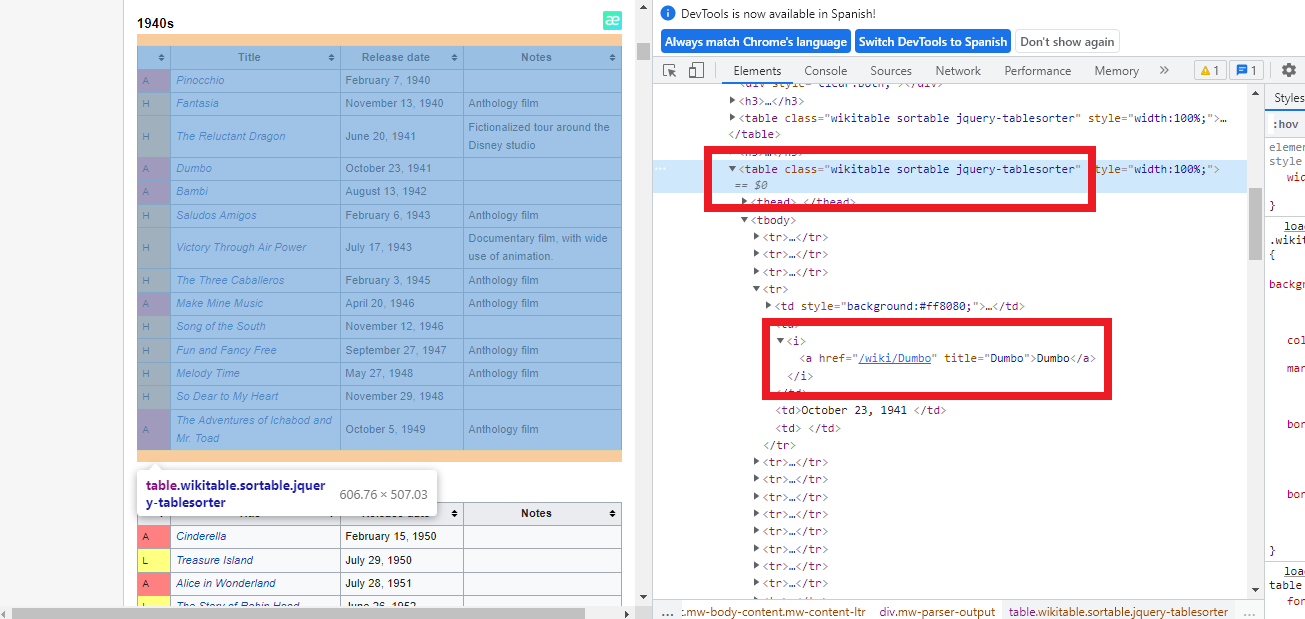

In [7]:
#Usamos el método select de BeautifulSoup
movies = soup.select(".wikitable.sortable i")
movies

[<i><a href="/wiki/Academy_Award_Review_of_Walt_Disney_Cartoons" title="Academy Award Review of Walt Disney Cartoons">Academy Award Review of Walt Disney Cartoons</a></i>,
 <i><a href="/wiki/Snow_White_and_the_Seven_Dwarfs_(1937_film)" title="Snow White and the Seven Dwarfs (1937 film)">Snow White and the Seven Dwarfs</a></i>,
 <i><a href="/wiki/Pinocchio_(1940_film)" title="Pinocchio (1940 film)">Pinocchio</a></i>,
 <i><a href="/wiki/Fantasia_(1940_film)" title="Fantasia (1940 film)">Fantasia</a></i>,
 <i><a href="/wiki/The_Reluctant_Dragon_(1941_film)" title="The Reluctant Dragon (1941 film)">The Reluctant Dragon</a></i>,
 <i><a href="/wiki/Dumbo" title="Dumbo">Dumbo</a></i>,
 <i><a href="/wiki/Bambi" title="Bambi">Bambi</a></i>,
 <i><a href="/wiki/Saludos_Amigos" title="Saludos Amigos">Saludos Amigos</a></i>,
 <i><a href="/wiki/Victory_Through_Air_Power_(film)" title="Victory Through Air Power (film)">Victory Through Air Power</a></i>,
 <i><a href="/wiki/The_Three_Caballeros" title=

In [8]:
#Con .a conseguimos el link del href
movies[0].a['href']

'/wiki/Academy_Award_Review_of_Walt_Disney_Cartoons'

In [9]:
#Y el titulo
movies[0].a['title']

'Academy Award Review of Walt Disney Cartoons'

### **Pasamos entonces la lógica en limpio**


In [10]:
def get_content_value(rowdata):
  if rowdata.find("li"):
    return [li.get_text(" ",strip=True).replace("\xa0", "") for li in rowdata.find_all("li")]
  elif rowdata.find("br"):
    return [text for text in rowdata.stripped_strings]

  else:
    return rowdata.get_text(" ",strip=True).replace("\xa0", "")
#.replace("\xa0", "") para limpiar las fechas


def cleanTags(soup): #Limpia las referencias [1],[2],etc que tienen ciertos valores                    
  for tag in soup.find_all(["sup","span"]):
    tag.decompose()




def get_infoBox(url):

  r = requests.get(url)
  soup= bs(r.content)
  info_box= soup.find(class_="infobox vevent")
  inforows=info_box.find_all("tr")

  cleanTags(soup)

  movie_information = {}
  for index,row in enumerate(inforows):
    if index ==0:
      movie_information["Title"]= row.find("th").get_text(" ", strip=True)
    elif index==1: #Es la imagen, no nos importa.
      continue 
    else:
      content_key= row.find("th").get_text(" ", strip=True)
      content_value = get_content_value(row.find("td"))
      movie_information[content_key] = content_value
  return movie_information




In [11]:
get_infoBox("https://en.wikipedia.org/wiki/The_Great_Locomotive_Chase")

{'Box office': '$1.7 million (US)',
 'Cinematography': 'Charles Boyle',
 'Country': 'United States',
 'Directed by': 'Francis D. Lyon',
 'Distributed by': 'Buena Vista Distribution',
 'Edited by': 'Ellsworth Hoagland',
 'Language': 'English',
 'Music by': 'Paul J. Smith',
 'Produced by': ['Lawrence Edward Watkin', 'Walt Disney'],
 'Production company': 'Walt Disney Productions',
 'Release date': 'June 8, 1956',
 'Running time': '85 minutes',
 'Starring': ['Fess Parker',
  'Jeffrey Hunter',
  'John Lupton',
  'Jeff York',
  'Slim Pickens'],
 'Title': 'The Great Locomotive Chase',
 'Written by': 'Lawrence Edward Watkin'}

In [16]:
movies = soup.select(".wikitable.sortable i a") #Obtenemos esos links de la lista de Wikipedia tal como vimos anteriormente. Ahora añado "a" en el select para obtener el link arbitrario
originalpath= "https://en.wikipedia.org/"

movie_info_list= [] #Creamos una lista de peliculas

for index,movie in enumerate(movies): #para cada link
  try: #intenta
    path= movie['href']
    fullpath=originalpath+path
    title= movie['title']

    movie_info_list.append(get_infoBox(fullpath)) #se agrega a la lista
  except Exception as e: #si hay error mostrar
    print(movie.get_text())
    print(e)


Zorro the Avenger
'NoneType' object has no attribute 'find'
The Sign of Zorro
'NoneType' object has no attribute 'find'
True-Life Adventures
'NoneType' object has no attribute 'find_all'
The London Connection
'NoneType' object has no attribute 'find'
Spirited Away
'NoneType' object has no attribute 'get_text'
Howl's Moving Castle
'NoneType' object has no attribute 'get_text'
The Nightmare Before Christmas 3D
'NoneType' object has no attribute 'get_text'
The Secret of the Magic Gourd
'NoneType' object has no attribute 'get_text'
Ponyo
'NoneType' object has no attribute 'get_text'
Tales from Earthsea
'NoneType' object has no attribute 'get_text'
Anaganaga O Dheerudu
'NoneType' object has no attribute 'get_text'
The Secret World of Arrietty
'NoneType' object has no attribute 'get_text'
Tini: The Movie
'NoneType' object has no attribute 'get_text'
Born in China
'NoneType' object has no attribute 'get_text'
The Beatles: Get Back–The Rooftop Concert
'NoneType' object has no attribute 'find'


Las peliculas que entran dentro de la excepcion no seran incluidas a la lista.

In [17]:
#Probemos la lista
movie_info_list[0]

{'Box office': '$45.472',
 'Country': 'United States',
 'Distributed by': 'RKO Radio Pictures',
 'Language': 'English',
 'Production company': 'Walt Disney Productions',
 'Release date': ['May19,1937'],
 'Running time': '41 minutes (74 minutes 1966 release)',
 'Title': 'Academy Award Review of'}

## **Data Cleaning**
Parece que tenemos algunos valores que se podrían ajustar como el tiempo, la fecha y los valores monetarios.

- Convertir tiempo en entero
- cnvertir fechas a datetime 
- Convertir Budget y Box Office a numeros

In [18]:
#Duración de la película a entero

def minToInt(runningtime):

  if runningtime =="N/A":
    return None
  if isinstance(runningtime, list): #es una lista de minutos
    entry= runningtime[0]
    return (entry.split(" ")[0])
  else: #es un string
    return (runningtime.split(" ")[0])

In [19]:
for movie in movie_info_list:
  movie["Running time (int)"] = minToInt(movie.get('Running time', 'N/A'))

In [20]:
movie_info_list[0]

{'Box office': '$45.472',
 'Country': 'United States',
 'Distributed by': 'RKO Radio Pictures',
 'Language': 'English',
 'Production company': 'Walt Disney Productions',
 'Release date': ['May19,1937'],
 'Running time': '41 minutes (74 minutes 1966 release)',
 'Running time (int)': '41',
 'Title': 'Academy Award Review of'}

In [21]:
#Budget y Box Office a floats

import re

amounts = r"thousand|million|billion"
number = r"\d+(,\d{3})*\.*\d*"

word_re = rf"\${number}(-|\sto\s|–)?({number})?\s({amounts})"
value_re = rf"\${number}"

def word_to_value(word):
    value_dict = {"thousand": 1000, "million": 1000000, "billion": 1000000000}
    return value_dict[word]

def parse_word_syntax(string):
    value_string = re.search(number, string).group()
    value = float(value_string.replace(",", ""))
    word = re.search(amounts, string, flags=re.I).group().lower()
    word_value = word_to_value(word)
    return value*word_value

def parse_value_syntax(string):
    value_string = re.search(number, string).group()
    value = float(value_string.replace(",", ""))
    return value

'''
money_conversion("$12.2 million") --> 12200000 ## Word syntax
money_conversion("$790,000") --> 790000        ## Value syntax
'''
def money_conversion(money):
    if money == "N/A":
        return None

    if isinstance(money, list):
        money = money[0]
        
    word_syntax = re.search(word_re, money, flags=re.I)
    value_syntax = re.search(value_re, money)

    if word_syntax:
        return parse_word_syntax(word_syntax.group())

    elif value_syntax:
        return parse_value_syntax(value_syntax.group())

    else:
        return None

In [22]:
for movie in movie_info_list:
    movie['Budget (float)'] = money_conversion(movie.get('Budget', "N/A"))
    movie['Box office (float)'] = money_conversion(movie.get('Box office', "N/A"))

In [23]:
movie_info_list[2]

{'Based on': ['The Adventures of Pinocchio', 'by', 'Carlo Collodi'],
 'Box office': '$164million',
 'Box office (float)': 164.0,
 'Budget': '$2.6 million',
 'Budget (float)': 2600000.0,
 'Country': 'United States',
 'Directed by': ['Ben Sharpsteen',
  'Hamilton Luske',
  'Bill Roberts',
  'Norman Ferguson',
  'Jack Kinney',
  'Wilfred Jackson',
  'T. Hee'],
 'Distributed by': 'RKO Radio Pictures',
 'Language': 'English',
 'Music by': ['Leigh Harline', 'Paul J. Smith'],
 'Produced by': 'Walt Disney',
 'Production company': 'Walt Disney Productions',
 'Release date': ['February7,1940 ( Center Theatre )',
  'February23,1940 (United States)'],
 'Running time': '88 minutes',
 'Running time (int)': '88',
 'Starring': ['Cliff Edwards',
  'Dickie Jones',
  'Christian Rub',
  'Walter Catlett',
  'Charles Judels',
  'Evelyn Venable',
  'Frankie Darro'],
 'Story by': ['Ted Sears',
  'Otto Englander',
  'Webb Smith',
  'William Cottrell',
  'Joseph Sabo',
  'Erdman Penner',
  'Aurelius Battaglia']

In [24]:
#Fechas a datetime
print([movie.get('Release date', 'N/A') for movie in movie_info_list])

[['May19,1937'], ['December21,1937 ( Carthay Circle Theatre )'], ['February7,1940 ( Center Theatre )', 'February23,1940 (United States)'], ['November13,1940'], ['June27,1941'], ['October23,1941 (New York City)', 'October31,1941 (U.S.)'], ['August9,1942 (World Premiere – London)', 'August13,1942 (Premiere – New York City)', 'August21,1942 (U.S.)'], ['August24,1942 (World Premiere – Rio de Janeiro)', 'February6,1943 (U.S. Premiere – Boston)', 'February19,1943 (U.S.)'], ['July17,1943'], ['December21,1944 (Mexico City)', 'February3,1945 (US)'], ['April20,1946 (New York City premiere)', 'August15,1946 (U.S.)'], ['November12,1946 (Premiere: Atlanta, Georgia)', 'November20,1946', 'March30,1947 (Stanford Theatre, Palo Alto, California)'], ['September27,1947'], 'May27,1948', ['November 29, 1948 (Chicago, Illinois)', 'January 19, 1949 (Indianapolis, Indiana)'], ['October5,1949'], ['February15,1950 (Boston)', 'March4,1950 (United States)'], ['June22,1950 (World Premiere-London)', 'July29,1950 (US

In [25]:
from datetime import datetime

dates = [movie.get('Release date', 'N/A') for movie in movie_info_list]

def clean_date(date):
    return date.split("(")[0].strip()

def date_conversion(date):
    if isinstance(date, list):
        date = date[0]
        
    if date == "N/A":
        return None
        
    date_str = clean_date(date)

    fmts = ["%B %d, %Y", "%d %B %Y"]
    for fmt in fmts:
        try:
            return datetime.strptime(date_str, fmt)
        except:
            pass
    return None

In [26]:
for movie in movie_info_list:
    movie['Release date (datetime)'] = date_conversion(movie.get('Release date', 'N/A'))

In [27]:
movie_info_list[1]

{'Based on': ['Snow White', 'by The', 'Brothers Grimm'],
 'Box office': '$418 million',
 'Box office (float)': 418000000.0,
 'Budget': '$1.49 million',
 'Budget (float)': 1490000.0,
 'Country': 'United States',
 'Directed by': ['David Hand',
  'William Cottrell',
  'Wilfred Jackson',
  'Larry Morey',
  'Perce Pearce',
  'Ben Sharpsteen'],
 'Distributed by': 'RKO Radio Pictures',
 'Language': 'English',
 'Music by': ['Frank Churchill', 'Paul Smith', 'Leigh Harline'],
 'Produced by': 'Walt Disney',
 'Production company': 'Walt Disney Productions',
 'Release date': ['December21,1937 ( Carthay Circle Theatre )'],
 'Release date (datetime)': None,
 'Running time': '83 minutes',
 'Running time (int)': '83',
 'Starring': ['Adriana Caselotti',
  'Lucille La Verne',
  'Harry Stockwell',
  'Roy Atwell',
  'Pinto Colvig',
  'Otis Harlan',
  'Scotty Mattraw',
  'Billy Gilbert',
  'Eddie Collins',
  'Moroni Olsen',
  'Stuart Buchanan'],
 'Title': 'Snow White and the Seven Dwarfs',
 'Written by': ['

## 4. Guardamos el DataSet

In [28]:
import json

with open("disneydata.json", 'w') as outfile:
    json.dump(movie_info_list, outfile)

TypeError: ignored

In [29]:
movie_info_copy = [movie.copy() for movie in movie_info_list]

for movie in movie_info_copy:
    current_date = movie['Release date (datetime)']
    if current_date:
        movie['Release date (datetime)'] = current_date.strftime("%B %d, %Y")
    else:
        movie['Release date (datetime)'] = None

In [31]:
with open("disneydata.json", 'w') as outfile:
    json.dump(movie_info_copy, outfile)

##5. Importamos a Dataframe

In [32]:
import pandas as pd

In [33]:
df=pd.read_json("/content/disneydata.json")

In [39]:
df.head()

,Title,Production company,Distributed by,Release date,Running time,Country,Language,Box office,Running time (int),Budget (float),Box office (float),Release date (datetime),Directed by,Written by,Based on,Produced by,Starring,Music by,Budget,Story by,Narrated by,Cinematography,Edited by,Languages,Screenplay by,Countries,Production companies,Color process,Layouts by,Created by,Original work,Owner
0,Academy Award Review of,Walt Disney Productions,RKO Radio Pictures,"[May19,1937]",41 minutes (74 minutes 1966 release),United States,English,$45.472,41,NaN,4.547200e+01,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Snow White and the Seven Dwarfs,Walt Disney Productions,RKO Radio Pictures,"[December21,1937 ( Carthay Circle Theatre )]",83 minutes,United States,English,$418 million,83,1490000.0,4.180000e+08,None,"[David Hand, William Cottrell, Wilfred Jackson...","[Ted Sears, Richard Creedon, Otto Englander, D...","[Snow White, by The, Brothers Grimm]",Walt Disney,"[Adriana Caselotti, Lucille La Verne, Harry St...","[Frank Churchill, Paul Smith, Leigh Harline]",$1.49 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Pinocchio,Walt Disney Productions,RKO Radio Pictures,"[February7,1940 ( Center Theatre ), February23...",88 minutes,United States,English,$164million,88,2600000.0,1.640000e+02,None,"[Ben Sharpsteen, Hamilton Luske, Bill Roberts,...",NaN,"[The Adventures of Pinocchio, by, Carlo Collodi]",Walt Disney,"[Cliff Edwards, Dickie Jones, Christian Rub, W...","[Leigh Harline, Paul J. Smith]",$2.6 million,"[Ted Sears, Otto Englander, Webb Smith, Willia...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fantasia,Walt Disney Productions,RKO Radio Pictures,"[November13,1940]",126 minutes,United States,English,$76.4–$83.3 million (United States and Canada),126,2280000.0,8.330000e+07,None,"[Samuel Armstrong, James Algar, Bill Roberts, ...",NaN,NaN,"[Walt Disney, Ben Sharpsteen]","[Leopold Stokowski, Deems Taylor]",See program,$2.28 million,"[Joe Grant, Dick Huemer]",Deems Taylor,James Wong Howe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,The Reluctant Dragon,Walt Disney Productions,RKO Radio Pictures,"[June27,1941]",74 minutes,United States,English,"$960,000 (worldwide rentals)",74,600000.0,9.600000e+05,None,"[Alfred Werker, (live action), Hamilton Luske,...","[Live-action:, Ted Sears, Al Perkins, Larry Cl...",NaN,Walt Disney,"[Robert Benchley, Frances Gifford, Buddy Peppe...","[Frank Churchill, Larry Morey]","$600,000",NaN,NaN,Bert Glennon,Paul Weatherwax,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
